In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("profiles.csv")

In [4]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [7]:
df=df.drop_duplicates(keep=False)

In [8]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success on here, met so...",you've got something to say. or if there's som...,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [9]:
for i in df:
    if ("essay" in i):
        df.drop(i,axis=1,inplace=True)

In [10]:
df["body_type"].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [11]:
df.loc[df["sex"]=="f"]

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
6,32.0,fit,strictly anything,socially,never,graduated from college/university,"white, other",65.0,-1.0,NaN,2012-06-25-20-45,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31.0,average,mostly anything,socially,never,graduated from college/university,white,65.0,-1.0,artistic / musical / writer,2012-06-29-12-30,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24.0,NaN,strictly anything,socially,NaN,graduated from college/university,white,67.0,-1.0,NaN,2012-06-29-23-39,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
13,30.0,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000.0,sales / marketing / biz dev,2012-06-13-16-06,"san francisco, california",NaN,straight,has dogs and likes cats,christianity but not too serious about it,f,NaN,no,english,single
14,29.0,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000.0,other,2012-06-29-08-55,"san leandro, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,34.0,average,mostly anything,socially,never,graduated from law school,white,67.0,-1.0,law / legal services,2012-06-29-20-47,"alameda, california",has a kid,straight,has dogs,christianity but not too serious about it,f,leo and it&rsquo;s fun to think about,no,english,single
9505,33.0,fit,mostly anything,socially,never,graduated from college/university,hispanic / latin,63.0,-1.0,artistic / musical / writer,2012-06-29-09-20,"san francisco, california",doesn&rsquo;t have kids,straight,has dogs,NaN,f,virgo,no,"english (fluently), spanish (okay)",single
9506,43.0,athletic,mostly vegetarian,socially,NaN,graduated from college/university,white,65.0,-1.0,artistic / musical / writer,2012-06-29-16-17,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,other and somewhat serious about it,f,leo and it&rsquo;s fun to think about,no,"english (fluently), spanish (poorly)",single
9508,62.0,average,NaN,socially,never,graduated from college/university,asian,60.0,-1.0,rather not say,2011-07-24-17-18,"san francisco, california",has a kid,straight,has dogs and dislikes cats,catholicism but not too serious about it,f,libra and it matters a lot,no,english (fluently),single


In [12]:
bodies={"average":"fit",
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(bodies,inplace=True)

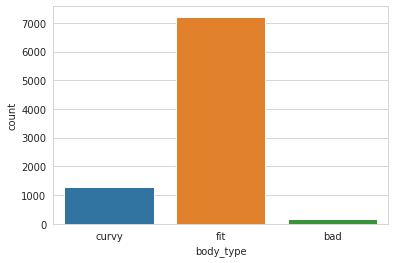

In [13]:
sns.countplot(df["body_type"])

In [14]:
df["diet"].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

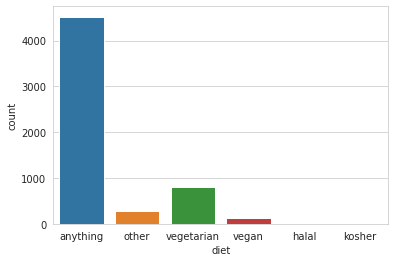

In [15]:
status={"mostly":"","strictly":""}
df["diet"].replace(status,regex=True,inplace=True)
df["diet"]=df["diet"].str.strip()
sns.countplot(df["diet"])

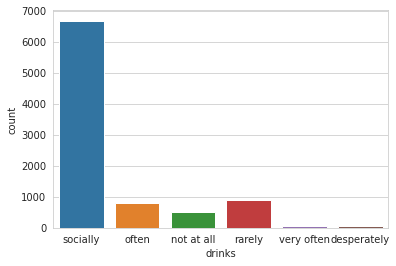

In [16]:
sns.countplot(df.drinks)

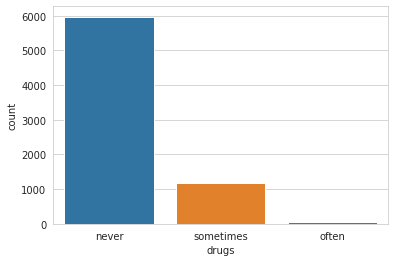

In [17]:
sns.countplot(df.drugs)

In [18]:
df.education.unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

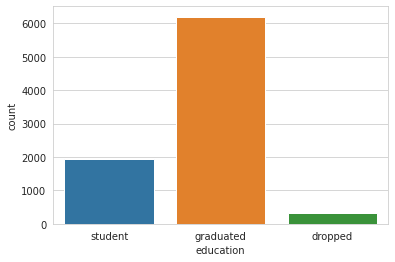

In [19]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True,inplace=True)
sns.countplot(df.education)

In [20]:
df.drop(["ethnicity","job"],axis=1,inplace=True)

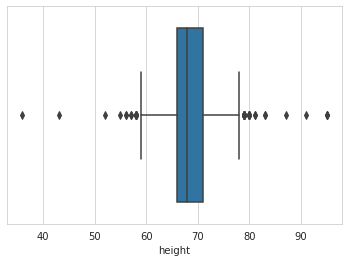

In [21]:
sns.boxplot("height",data=df)

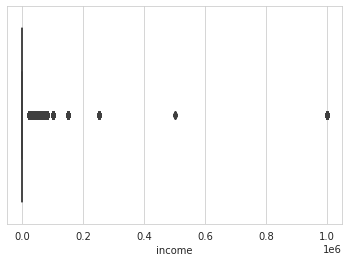

In [22]:
sns.boxplot("income",data=df)

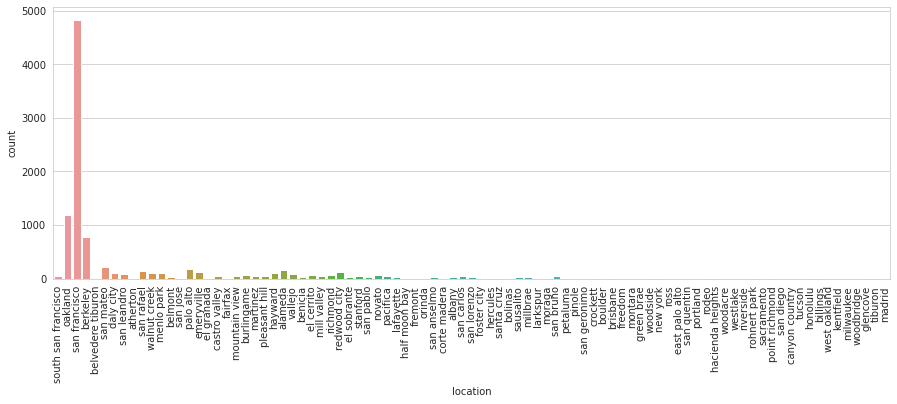

In [23]:
df.location=df.location.str.split(",").str[0]
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(df.location)

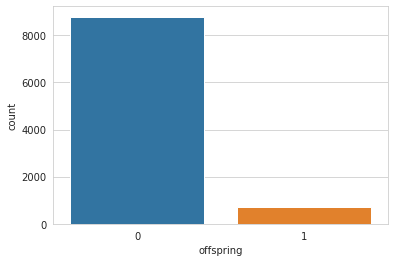

In [24]:
offsprings=[]
for i in df.offspring.fillna("bilinmiyor").str.replace("[^\w\s]",""):
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "bilinmiyor" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")
        
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)
sns.countplot(df.offspring)

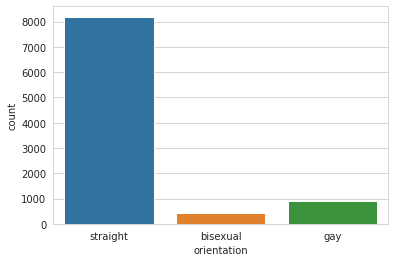

In [25]:
sns.countplot(df.orientation)

In [26]:
df.drop(["pets"],axis=1,inplace=True)

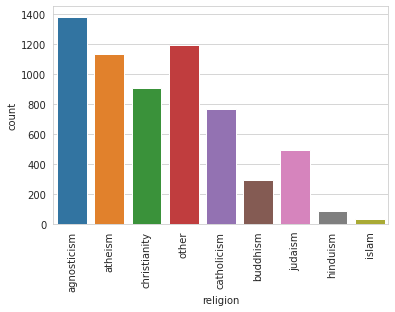

In [27]:
df["religion"]=df["religion"].str.split().str[0]
plt.xticks(rotation=90)
sns.countplot(df.religion)

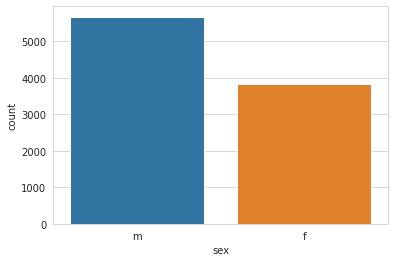

In [28]:
sns.countplot(df.sex)

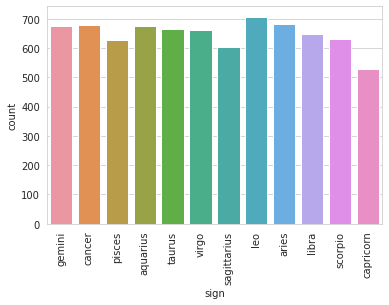

In [29]:
df["sign"]=df["sign"].str.split().str[0]
plt.xticks(rotation=90)
sns.countplot(df.sign)

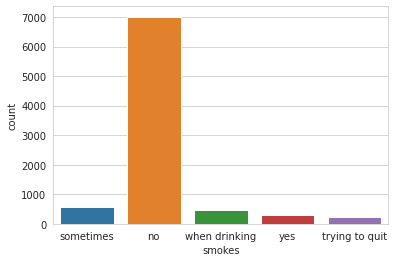

In [30]:
sns.countplot(df.smokes)

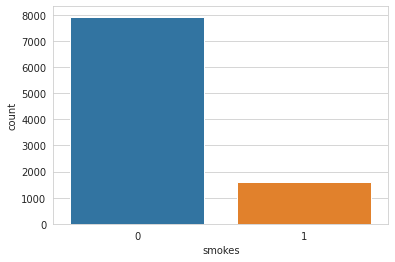

In [31]:
smokes=[]
for i in df.smokes.fillna("bilinmiyor").str.replace("[^\w\s]",""):
    if "no" in i:
        smokes.append("0")
    elif "bilinmiyor" in i:
        smokes.append("0")
    else:
        smokes.append("1")
        
df["smokes"]=smokes
df["smokes"]=df["smokes"].astype(int)
sns.countplot(df.smokes)

In [32]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)

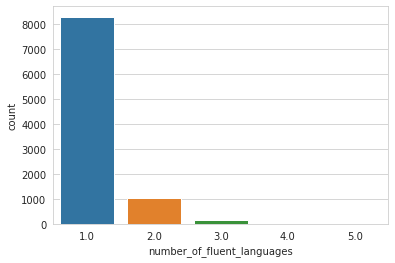

In [33]:
sns.countplot(df["number_of_fluent_languages"])

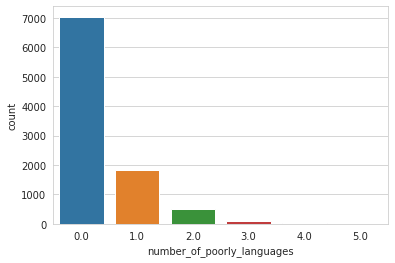

In [34]:
sns.countplot(df["number_of_poorly_languages"])

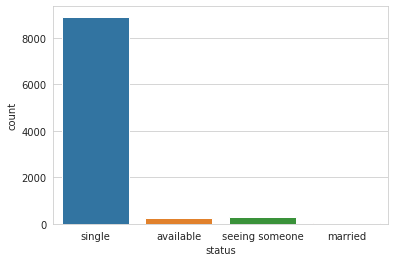

In [35]:
sns.countplot(df.status)

In [36]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].median(),inplace=True)

In [37]:
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True)

In [38]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
last_online                   0
location                      0
offspring                     0
orientation                   0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
number_of_fluent_languages    0
number_of_poorly_languages    0
dtype: int64

In [39]:
generations=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        generations.append("Millennial")
    elif (i>=33) and (i<=47):
        generations.append("Gen X-er")
    elif (48>=33) and (i<=70):
        generations.append("Boomers")
    else:
        generations.append("Unkown")

df["generations"]=generations

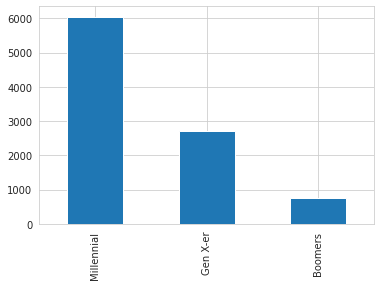

In [40]:
df["generations"].replace("Unkown","Boomers",regex=True,inplace=True)
df["generations"].value_counts().plot.bar()

In [41]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,religion,sex,sign,smokes,status,number_of_fluent_languages,number_of_poorly_languages,generations
5495,24.0,fit,anything,socially,never,graduated,66.0,-1.0,2012-06-30-01-23,san francisco,0,straight,christianity,m,libra,0,single,1.0,1.0,Millennial
4476,24.0,fit,anything,socially,never,graduated,65.0,-1.0,2012-06-29-23-29,san francisco,0,straight,agnosticism,f,leo,0,single,1.0,0.0,Millennial
3876,32.0,fit,anything,socially,never,graduated,69.0,-1.0,2012-06-27-18-34,oakland,0,straight,agnosticism,m,leo,0,single,1.0,0.0,Millennial
5376,25.0,fit,anything,socially,never,graduated,67.0,-1.0,2012-06-03-01-38,san francisco,0,straight,atheism,m,leo,0,single,1.0,0.0,Millennial
2832,22.0,fit,anything,socially,never,graduated,66.0,70000.0,2012-06-30-00-29,san francisco,0,straight,agnosticism,m,libra,0,single,3.0,1.0,Millennial


In [42]:
df.corr()

,age,height,income,offspring,smokes,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.022078,0.011424,0.341753,-0.147282,-0.024795,-0.001559
height,-0.022078,1.000000,0.073105,-0.033389,0.035629,0.015458,0.036414
income,0.011424,0.073105,1.000000,0.015045,0.039872,0.039186,0.028577
offspring,0.341753,-0.033389,0.015045,1.000000,-0.007899,0.000841,-0.012303
smokes,-0.147282,0.035629,0.039872,-0.007899,1.000000,0.010306,-0.013220
number_of_fluent_languages,-0.024795,0.015458,0.039186,0.000841,0.010306,1.000000,0.067774
number_of_poorly_languages,-0.001559,0.036414,0.028577,-0.012303,-0.013220,0.067774,1.000000


In [43]:
df.describe()

,age,height,income,offspring,smokes,number_of_fluent_languages,number_of_poorly_languages
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155,0.076624,0.166597,1.146941,0.338974
std,9.445488,3.905229,91428.807808,0.266008,0.372635,0.413248,0.645990
min,18.000000,36.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
75%,36.000000,71.000000,-1.000000,0.000000,0.000000,1.000000,1.000000
max,110.000000,95.000000,1000000.000000,1.000000,1.000000,5.000000,5.000000


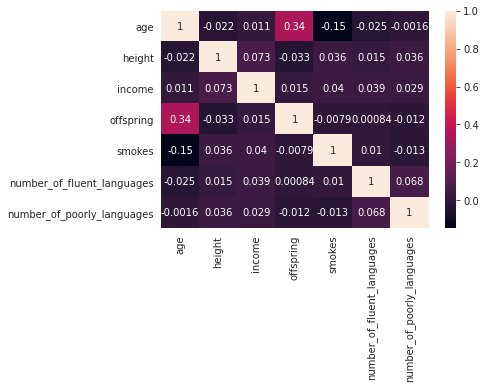

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
df_reg=pd.get_dummies(df,drop_first=True)

In [46]:
df_reg.shape

(9514, 6900)

In [47]:
x,y=df_reg.drop("age",axis=1),df[["age"]]

In [48]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [49]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.853030,3.654769,2.975959
Ridge,0.837786,3.839634,3.094992
LinearRegression,0.805711,4.202134,3.346136
ExtraTreeRegressor,0.728107,4.971014,3.915397
Lasso,0.572190,6.235505,4.213471
KNeighborsRegressor,0.477414,6.891676,4.520652
ElasticNet,0.308607,7.926994,5.422564


In [50]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [51]:
y=df[["generations"]]

In [52]:
df_class=df.drop(["generations","age"],axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [53]:
classification_funct(x,y)

,accuracy_score
XGBClassifier,0.679979
RandomForestClassifier,0.663163
BernoulliNB,0.662112
SVC,0.647399
GaussianNB,0.642144
LogisticRegression,0.642144
DecisionTreeClassifier,0.621650
KNeighborsClassifier,0.610615
